In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_load import get_data_loader
from main import make_parser
from tqdm import tqdm
import d2l.torch as d2l
import torch

In [200]:
test_energy = np.load('D:/研究生生涯/学习/时间序列异常检测/Transformer-DDPM/data/SMD/test_energy.npy',allow_pickle=True).tolist()

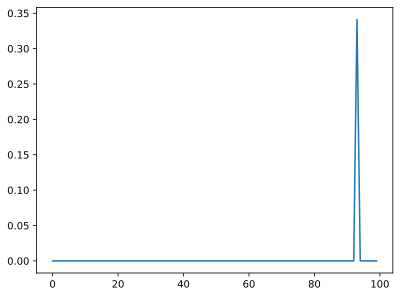

In [201]:
plt.plot(test_energy[:100])

In [203]:
test_label = np.load('D:/研究生生涯/学习/时间序列异常检测/Transformer-DDPM/data/SMD/test_labels.npy',allow_pickle=True).tolist()
pred_label = np.load('D:/研究生生涯/学习/时间序列异常检测/Transformer-DDPM/data/SMD/pred.npy',allow_pickle=True).tolist()

In [209]:
test_df = pd.DataFrame(test_energy)
test_df.columns=['energy']
test_df['label'] = test_label

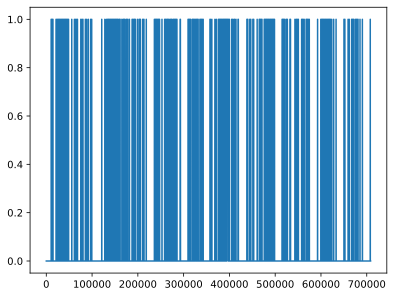

In [226]:
plt.plot(test_label)

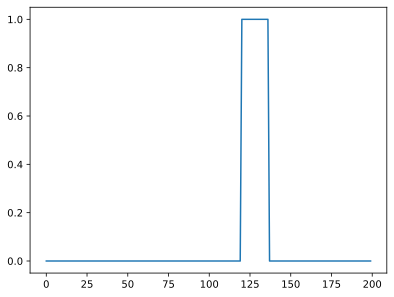

In [222]:
plt.plot(test_label[10500:10700])
# plt.plot(pred_label[500:800])

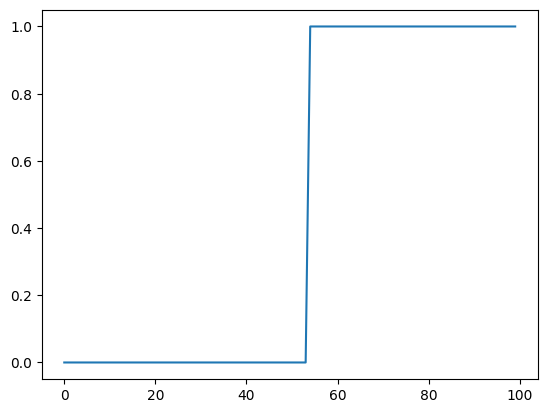

In [94]:
plt.plot(pred_label[2500:2600])

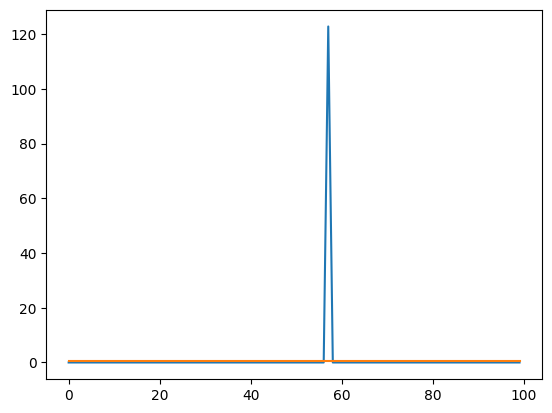

In [97]:
plt.plot(test_energy[2500:2600])
plt.plot(0.4629050743782635*np.ones(100))

* MSL:thre:0.4629050743782635, anomaly_ratio:0.9772727272727273
* SMD:anmaly_ratio:0.5056465273856579,thre:0.4741090899745439, anomaly_ratio:0.5056465273856579

In [105]:
x_0_predict = np.concatenate(test_x_0_list).reshape(-1,55)

In [109]:
noise_list = np.load('D:/研究生生涯/学习/时间序列异常检测/Transformer-DDPM/data/MSL/noise_list.npy',allow_pickle=True).tolist()

In [113]:
noise_list= np.concatenate(noise_list).reshape(-1,1)

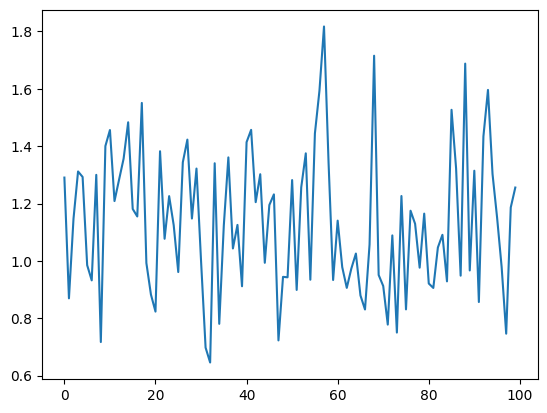

In [115]:
plt.plot(noise_list[:,0][2500:2600])

In [189]:
test_input_list = np.concatenate(test_input_list).reshape(-1,25)

In [190]:
test_input_list.shape

(1076768, 25)

In [ ]:
plt.plot(test_input_list[:,0][2500:2600])

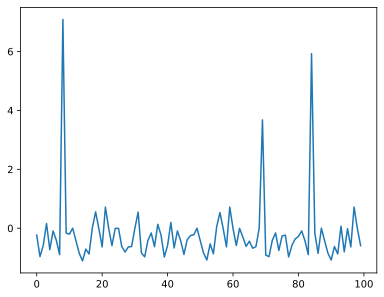

In [193]:
d2l.use_svg_display()
plt.plot(test_input_list[:,0][500:600])
# plt.plot(test_energy[2500:2600])

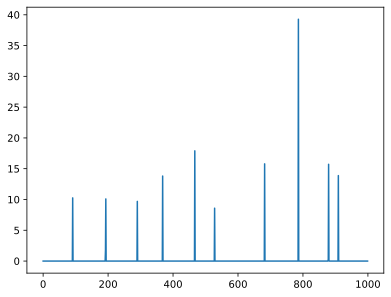

In [169]:
plt.plot(test_energy[4000:5000])

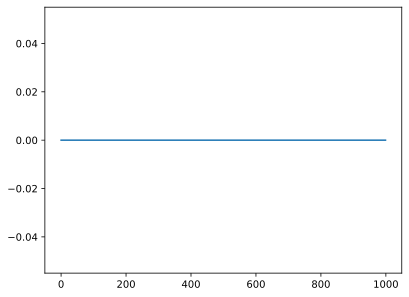

In [170]:
plt.plot(test_label[4000:5000])
# plt.plot(pred_label[500:800])

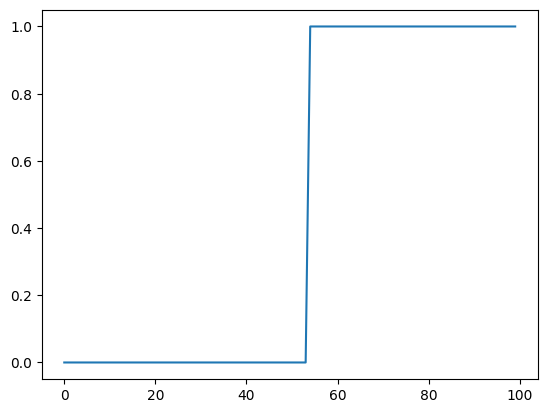

In [128]:
plt.plot(pred_label[2500:2600])

In [35]:
def get_metrics(type='loss_1'):
    if type=='loss_1':
        gc_diff_true_loss_1 = pd.read_csv('TransformerDDPM_final/MSL407-3-GC-B128-E150-noise-lr0.001-T1000-r1-diffTrue/loss_1.csv')
        gc_diff_false_loss_1 = pd.read_csv('TransformerDDPM_final/MSL407-3-GC-B128-E150-noise-lr0.001-T1000-r1-diffFalse/loss_1.csv')
        sn_diff_true_loss_1 = pd.read_csv('TransformerDDPM_final/MSL407-3-SN-B128-E150-noise-lr0.001-T1000-r1-diffTrue/loss_1.csv')
        sn_diff_false_loss_1 = pd.read_csv('TransformerDDPM_final/MSL407-3-SN-B128-E150-noise-lr0.001-T1000-r1-diffFalse/loss_1.csv')
        loss_list=[sn_diff_false_loss_1['Value'].values, gc_diff_false_loss_1['Value'].values,
                   sn_diff_true_loss_1['Value'].values, gc_diff_true_loss_1['Value'].values]
    elif type=='loss_2':
        gc_diff_true_loss_2 = pd.read_csv('TransformerDDPM_final/MSL407-3-GC-B128-E150-noise-lr0.001-T1000-r1-diffTrue/loss_2.csv')
        gc_diff_false_loss_2 = pd.read_csv('TransformerDDPM_final/MSL407-3-GC-B128-E150-noise-lr0.001-T1000-r1-diffFalse/loss_2.csv')
        sn_diff_true_loss_2 = pd.read_csv('TransformerDDPM_final/MSL407-3-SN-B128-E150-noise-lr0.001-T1000-r1-diffTrue/loss_2.csv')
        sn_diff_false_loss_2 = pd.read_csv('TransformerDDPM_final/MSL407-3-SN-B128-E150-noise-lr0.001-T1000-r1-diffFalse/loss_2.csv')
        loss_list=[sn_diff_false_loss_2['Value'].values, gc_diff_false_loss_2['Value'].values,
                   sn_diff_true_loss_2['Value'].values, gc_diff_true_loss_2['Value'].values]
    elif type=='noise_loss':
        gc_diff_true_noise_loss = pd.read_csv('TransformerDDPM_final/MSL407-3-GC-B128-E150-noise-lr0.001-T1000-r1-diffTrue/noise_loss.csv')
        gc_diff_false_noise_loss = pd.read_csv('TransformerDDPM_final/MSL407-3-GC-B128-E150-noise-lr0.001-T1000-r1-diffFalse/noise_loss.csv')
        sn_diff_true_noise_loss = pd.read_csv('TransformerDDPM_final/MSL407-3-SN-B128-E150-noise-lr0.001-T1000-r1-diffTrue/noise_loss.csv')
        sn_diff_false_noise_loss = pd.read_csv('TransformerDDPM_final/MSL407-3-SN-B128-E150-noise-lr0.001-T1000-r1-diffFalse/noise_loss.csv')
        loss_list=[sn_diff_false_noise_loss['Value'].values, gc_diff_false_noise_loss['Value'].values,
                   sn_diff_true_noise_loss['Value'].values, gc_diff_true_noise_loss['Value'].values]
    else:
        gc_diff_true_f1 = pd.read_csv('TransformerDDPM_final/MSL407-3-GC-B128-E150-noise-lr0.001-T1000-r1-diffTrue/f1.csv')
        gc_diff_false_f1 = pd.read_csv('TransformerDDPM_final/MSL407-3-GC-B128-E150-noise-lr0.001-T1000-r1-diffFalse/f1.csv')
        sn_diff_true_f1 = pd.read_csv('TransformerDDPM_final/MSL407-3-SN-B128-E150-noise-lr0.001-T1000-r1-diffTrue/f1.csv')
        sn_diff_false_f1 = pd.read_csv('TransformerDDPM_final/MSL407-3-SN-B128-E150-noise-lr0.001-T1000-r1-diffFalse/f1.csv')
        loss_list=[sn_diff_false_f1['Value'].values, gc_diff_false_f1['Value'].values,
                   sn_diff_true_f1['Value'].values, gc_diff_true_f1['Value'].values] 
    return loss_list


In [17]:
loss_list = get_metrics(type='loss_1')

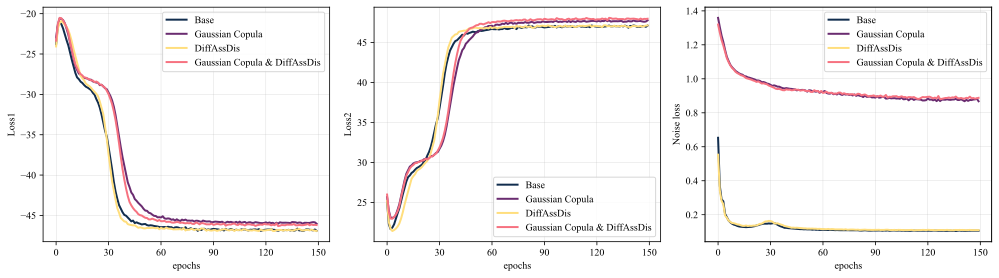

In [99]:
fig, axs = plt.subplots(1,3, figsize=(14,4))
plt.rcParams['font.sans-serif'] = 'Times New Roman'
label = ['Base', 'Gaussian Copula', 'DiffAssDis', 'Gaussian Copula & DiffAssDis']
ax1 = axs[0]
loss_list_1 = get_metrics(type='loss_1')
plot_list(ax1, loss_list_1)
ax1.legend(label)
ax1.set_xlabel('epochs')
ax1.set_ylabel('Loss1')
ax2 = axs[1]
loss_list_2 = get_metrics(type='loss_2')
plot_list(ax2, loss_list_2)
ax2.legend(label)
ax2.set_xlabel('epochs')
ax2.set_ylabel('Loss2')
ax3 = axs[2]
loss_list_3 = get_metrics(type='noise_loss')
plot_list(ax3, loss_list_3)
ax3.legend(label)
ax3.set_xlabel('epochs')
ax3.set_ylabel('Noise loss')
plt.tight_layout() 
plt.savefig('fig/MSL_%s.svg' % 'loss', dpi=300, bbox_inches='tight')
# plt.legend()

In [122]:
def plot_list(ax, loss_list):
    import d2l.torch as d2l
    d2l.use_svg_display()
    plt.rcParams['font.sans-serif'] = 'Times New Roman'
    colors = ['#112d4e', '#6a2c70', '#ffde7d', '#f67280']

    label = ['Base', 'Gaussian Copula', 'DiffAssDis', 'Gaussian Copula & DiffAssDis']
    marker = ['*', '']
    for i in range(4):
        ax.plot(loss_list[i], linewidth=2, color=colors[i], label=label[i])
        ax.grid(True, linewidth=0.2)
    # ax.xlim([0,151])
    x = np.arange(0,151,30)
    ax.set_xticks(x)
    plt.legend(label)
    ax = plt.gca()
    ax.spines['bottom'].set_linewidth(1);  ###设置底部坐标轴的粗细
    ax.spines['left'].set_linewidth(1);  ####设置左边坐标轴的粗细
    ax.spines['right'].set_linewidth(1);  ###设置右边坐标轴的粗细
    ax.spines['top'].set_linewidth(1);  ####设置上部坐标轴的粗细
    # # plt.legend(label)
    # # plt.show()
    # # plt.savefig('fig/MSL_%s.svg' % type, dpi=300, bbox_inches='tight')

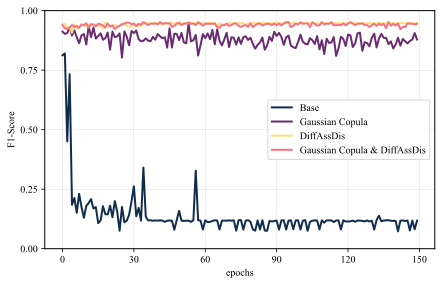

In [130]:
fig, axs = plt.subplots(1,1, figsize=(7,4.3))
ax = axs
f1_list = get_metrics(type='f1')
plot_list(ax, f1_list)
label = ['Base', 'Gaussian Copula', 'DiffAssDis', 'Gaussian Copula & DiffAssDis']
plt.xlabel('epochs')
plt.ylabel('F1-Score')
# x = np.arange(0,151,30)
y=np.arange(0,1.01,0.25)

plt.yticks(y)
# plt.xlim(x)
# plt.ylim(y)
plt.legend(label)
plt.savefig('fig/MSL_%s.svg' % 'f1', dpi=300, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(1,3)
ax1 = axs[0,0]
ax1.plot(cos_betas)
ax1.set_title('cosine_beta_schedule')

ax2 = axs[0,1]
ax2.plot(ln_betas)
ax2.set_title('linear_beta_schedule')

ax3 = axs[1,0]
ax3.plot(qd_betas)
ax3.set_title('quadratic_beta_schedule')

ax4 = axs[1,1]
ax4.plot(sg_betas)
ax4.set_title('sigmoid_beta_schedule')
# plt.subplots_adjust(bottom=0.1, right=1.2, top=1.2)
plt.tight_layout()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Time New Roman


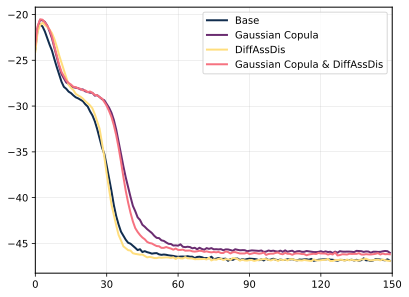

In [14]:
import d2l.torch as d2l
d2l.use_svg_display()
# if type=='loss_1':
plt.rcParams['font.sans-serif'] = 'Time New Roman'
colors = ['#112d4e', '#6a2c70', '#ffde7d', '#f67280']
gc_diff_true_loss_1 = pd.read_csv('TransformerDDPM_final/MSL407-3-GC-B128-E150-noise-lr0.001-T1000-r1-diffTrue/loss_1.csv')
gc_diff_false_loss_1 = pd.read_csv('TransformerDDPM_final/MSL407-3-GC-B128-E150-noise-lr0.001-T1000-r1-diffFalse/loss_1.csv')
sn_diff_true_loss_1 = pd.read_csv('TransformerDDPM_final/MSL407-3-SN-B128-E150-noise-lr0.001-T1000-r1-diffTrue/loss_1.csv')
sn_diff_false_loss_1 = pd.read_csv('TransformerDDPM_final/MSL407-3-SN-B128-E150-noise-lr0.001-T1000-r1-diffFalse/loss_1.csv')
loss_list=[sn_diff_false_loss_1['Value'].values, gc_diff_false_loss_1['Value'].values,
           sn_diff_true_loss_1['Value'].values, gc_diff_true_loss_1['Value'].values]
label = ['Base', 'Gaussian Copula', 'DiffAssDis', 'Gaussian Copula & DiffAssDis']
for i in range(4):
    plt.plot(loss_list[i], linewidth=2, color=colors[i], label=label[i])
    plt.grid(True, linewidth=0.2)
plt.xlim([0,150])
x = np.arange(0,151,30)
plt.xticks(x)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(1);  ###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(1);  ####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(1);  ###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(1);  ####设置上部坐标轴的粗细
plt.legend(label)
plt.show()

In [ ]:
# train_loader = get_data_loader('./data/MSL', 128, win_size=100,
#                                             slide_step=100, mode='train', transform=True,
#                                             dataset='MSL')
# progress_bar = tqdm
# tensor_type = torch.cuda.FloatTensor
# # train_input_list = [] 
# def get_test_input(loader):
#     train_input_list = [] 
#     for cur_iter, (input_data, labels) in enumerate(
#                 progress_bar(loader)
#         ):
#         with torch.no_grad():
#             input = input_data.type(tensor_type)
#             train_input_list.append(input.cpu().numpy())
#     return train_input_list
# test_input_list = get_test_input(test_loader)

In [38]:
train = np.load(r'D:/研究生生涯/学习/时间序列异常检测/Transformer-DDPM/data/MSL/MSL_train.npy')
test = np.load(r'D:/研究生生涯/学习/时间序列异常检测/Transformer-DDPM/data/MSL/MSL_test.npy')
test_label = np.load(r'D:/研究生生涯/学习/时间序列异常检测/Transformer-DDPM/data/MSL/MSL_test_label.npy')

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 标准化
def scaler(default='StandardScaler'):
    if default == "MinMaxScaler":#默认为0到1
        return MinMaxScaler()
    return StandardScaler()

In [40]:
scaler = scaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [45]:
train_x = train[:,0]
test_x = test[:,0]

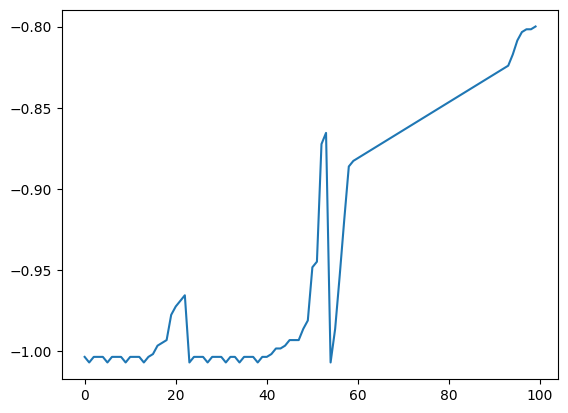

In [7]:
# 绘制曲线
plt.plot(train_x[50:150])

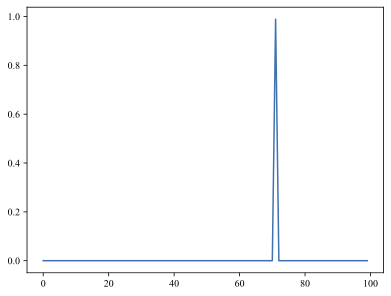

In [172]:
# 绘制曲线
d2l.use_svg_display()
plt.rcParams['font.sans-serif'] = 'Times New Roman'
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(test_energy_sample, color='#3f72af')
# ax1.plot(thre*np.ones(100),'--',color='r')
# plt.plot(test_energy_sample)
# plt.plot(train_x[350:750], color='#3f72af')
# ax2 = ax1.twinx()
# ax2.plot(test_energy[500:700],'r',)
# ax2.plot(list(range(200)), thre*np.ones(200))
plt.savefig('./fig/test_energy_sample_MSL_500_600.png', dpi=300, bbox_inches='tight')

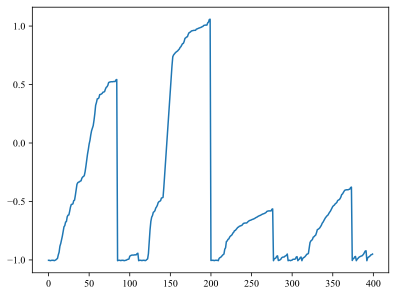

In [131]:
plt.plot(train_x[350:750])

In [67]:
lone_index = [] 
for i in range(1, len(test_label)-1):
    label = test_label[i]
    if test_label[i-1] != label and test_label[i+1] != label:
        lone_index.append(i)

In [98]:
test_energy_sn = np.load('D:/研究生生涯/学习/时间序列异常检测/Transformer-DDPM/data/MSL/test_energy_sn.npy')

In [99]:
test_energy = np.load('D:/研究生生涯/学习/时间序列异常检测/Transformer-DDPM/data/MSL/test_energy.npy')

In [157]:
test_noise_list = np.load('D:/研究生生涯/学习/时间序列异常检测/Transformer-DDPM/data/MSL/test_noise_list_sn.npy',allow_pickle=True).tolist()

In [165]:
train_noise_list = np.load('D:/研究生生涯/学习/时间序列异常检测/Transformer-DDPM/data/MSL/train_noise_list_sn.npy',allow_pickle=True).tolist()

In [166]:
test_noise_sample = np.concatenate(test_noise_list[0])
train_noise_sample = np.concatenate(train_noise_list[0])

In [161]:
test_noise_sample

array([0.0926953 , 0.09302914, 0.07595565, ..., 0.06573211, 0.08377624,
       0.10619732], dtype=float32)

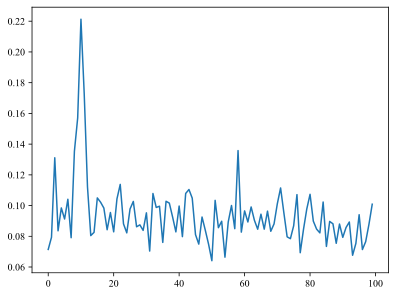

In [168]:
plt.plot(train_noise_sample[:100])

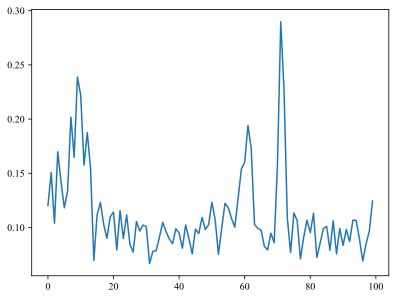

In [164]:
plt.plot(test_noise_sample[500:600])

In [104]:
thre = np.percentile(test_energy, 100 - 1)

In [105]:
thre

0.3999941414593913

In [148]:
test_energy_sample = test_energy[500:600]

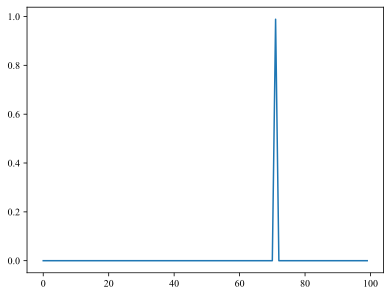

In [149]:
plt.plot(test_energy_sample)

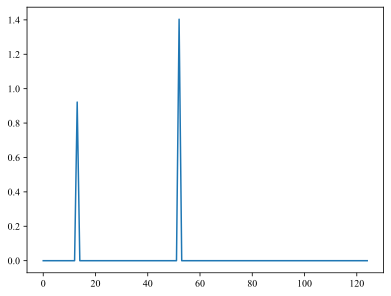

In [155]:
plt.plot(test_energy[275:400])